In [22]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, pylab as pl 

In [25]:
# read in the training and testing data
# Substitute with the helper functions later 
df_tr = pd.read_csv("train.csv")[0:50]

,Id,Prediction,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,100000,s,138.470,51.655,97.827,27.980,0.910,124.711,2.666,3.064,...,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.240,-2.475,113.497
1,100001,b,160.937,68.768,103.235,48.146,-999.000,-999.000,-999.000,3.473,...,-1.916,164.546,1,46.226,0.725,1.158,-999.000,-999.000,-999.000,46.226
2,100002,b,-999.000,162.172,125.953,35.635,-999.000,-999.000,-999.000,3.148,...,-2.186,260.414,1,44.251,2.053,-2.028,-999.000,-999.000,-999.000,44.251
3,100003,b,143.905,81.417,80.943,0.414,-999.000,-999.000,-999.000,3.310,...,0.060,86.062,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
4,100004,b,175.864,16.915,134.805,16.405,-999.000,-999.000,-999.000,3.891,...,-0.871,53.131,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
5,100005,b,89.744,13.550,59.149,116.344,2.636,284.584,-0.540,1.362,...,2.237,282.849,3,90.547,-2.412,-0.653,56.165,0.224,3.106,193.660
6,100006,s,148.754,28.862,107.782,106.130,0.733,158.359,0.113,2.941,...,-1.443,294.074,2,123.010,0.864,1.450,56.867,0.131,-2.767,179.877
7,100007,s,154.916,10.418,94.714,29.169,-999.000,-999.000,-999.000,2.897,...,-1.761,187.299,1,30.638,-0.715,-1.724,-999.000,-999.000,-999.000,30.638
8,100008,b,105.594,50.559,100.989,4.288,-999.000,-999.000,-999.000,2.904,...,0.024,129.804,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
9,100009,s,128.053,88.941,69.272,193.392,-999.000,-999.000,-999.000,1.609,...,0.845,294.741,1,167.735,-2.767,-2.514,-999.000,-999.000,-999.000,167.735


In [3]:
#df_tr.shape: 250,000 

# Apply filtering on DER_mass_jet_jet reduces to 1/4 of the original data set 
# df_tr[~(df_tr['DER_mass_jet_jet']==-999)].shape:  72,543

df_tr = df_tr[~(df_tr['DER_mass_jet_jet']==-999)]

dict_tr = dict(s=1, b=-1)

# Apply the dictionary to the dataset 
df_tr = df_tr.replace(dict_tr, regex=True)

# Iterating over remaining columns to remove missing data 
for col in df_tr.columns: 
    df_tr = df_tr[~(df_tr[col]==-999)]

# Final: df_tr.shape: 68,114 

df_m = np.mean(df_tr,0)
df_st = np.std(df_tr,0)

# Skip the first two elements (ID and prediction)
df_tr.iloc[:, 2:] = (df_tr.iloc[:, 2:] - df_m[2:])/df_st

# df_tr.head()

# df_tr.to_csv("clean_train_data.csv", index=False)


In [5]:
df_tr.head()

,Id,Prediction,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,100000,1,0.257671,0.532835,0.474611,-1.093454,-0.870648,-0.632428,0.987313,1.378045,...,-0.156564,-0.542982,-0.660444,-0.578666,1.234399,0.251795,-0.367844,0.612965,-1.359329,-0.645152
5,100005,-1,-0.544388,-0.706350,-0.475044,0.064383,0.115251,-0.233525,0.094923,-0.819132,...,1.229416,-0.370559,1.514133,-0.239608,-1.377788,-0.354529,-0.054320,0.115912,1.711823,0.094961
6,100006,1,0.426952,-0.208400,0.719034,-0.069451,-0.971751,-0.548472,0.276686,1.219260,...,-0.799385,-0.290304,-0.660444,0.236631,0.498040,0.807823,-0.032535,0.070414,-1.520013,-0.032292
11,100011,-1,-0.132873,-0.812497,-0.068375,-1.056294,0.073553,-0.313332,-0.144736,1.150840,...,1.180350,-0.315521,1.514133,-0.441676,-0.449036,0.173863,-0.032256,0.873721,-1.141415,-0.163737
23,100023,1,0.307234,-1.123065,0.812311,0.820835,-0.273740,-0.034514,-0.011685,-0.853987,...,-0.540272,0.858731,-0.660444,1.300559,0.665238,0.789031,0.762212,-0.384076,-1.529918,0.873721


/Users/ztian/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


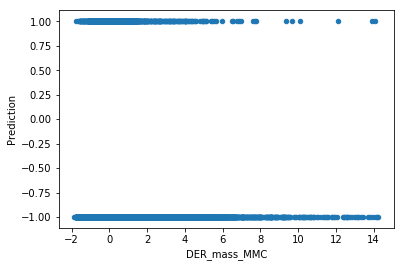

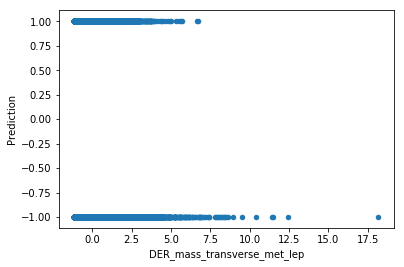

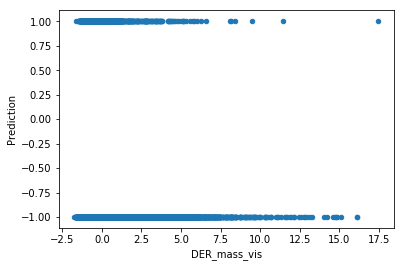

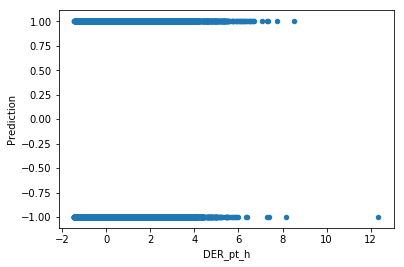

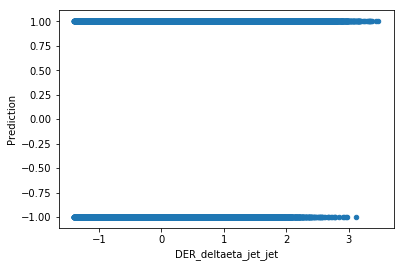

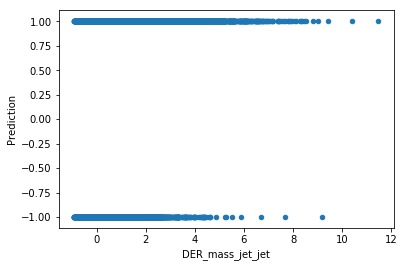

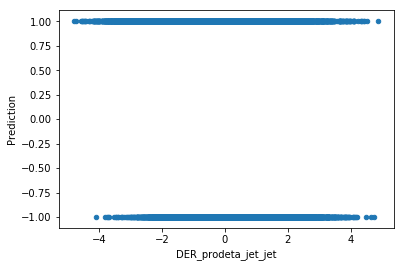

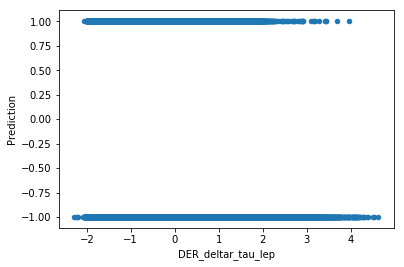

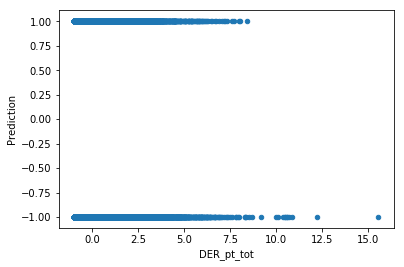

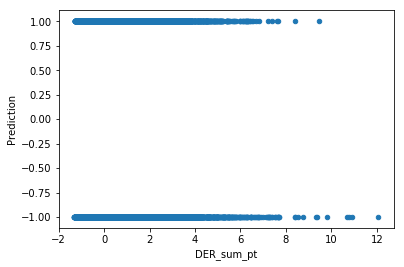

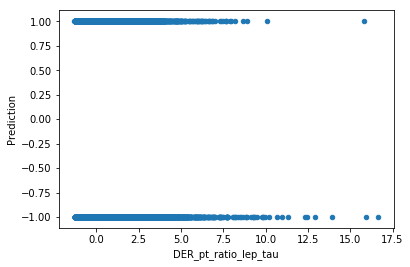

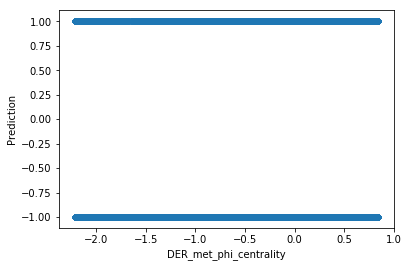

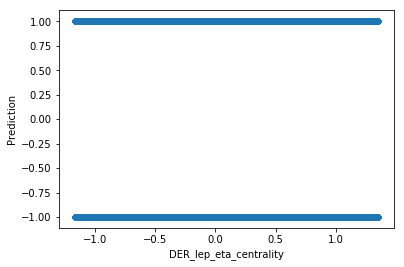

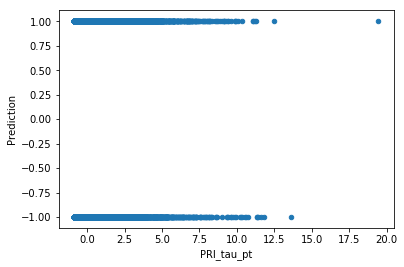

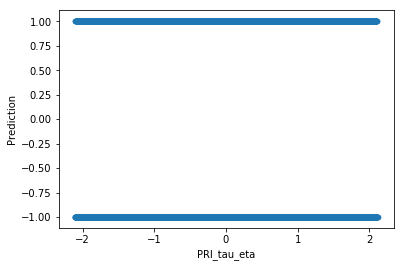

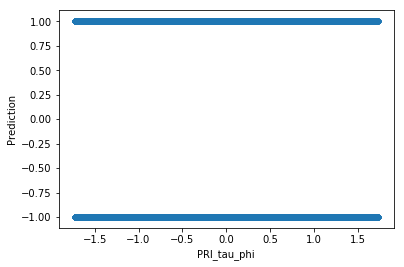

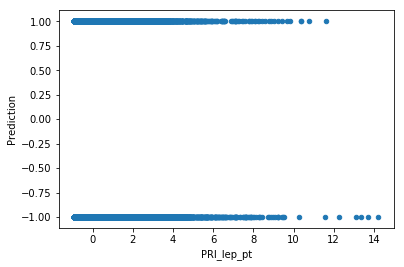

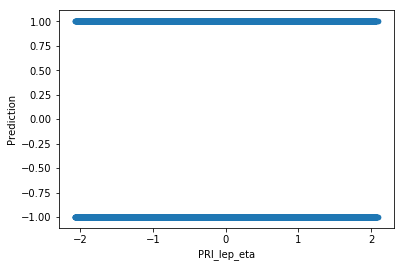

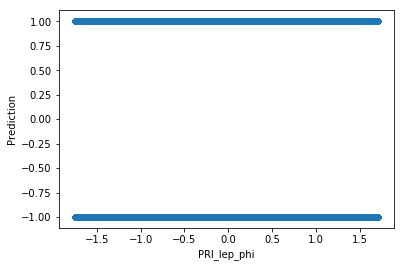

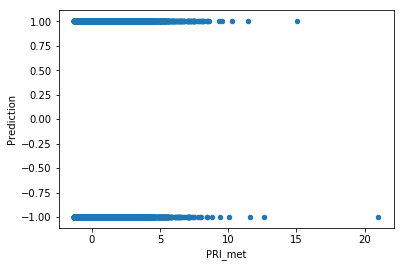

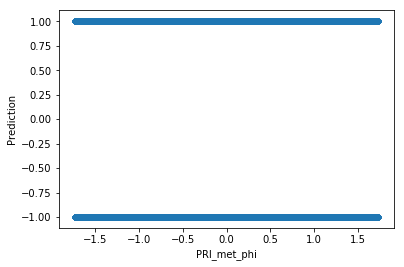

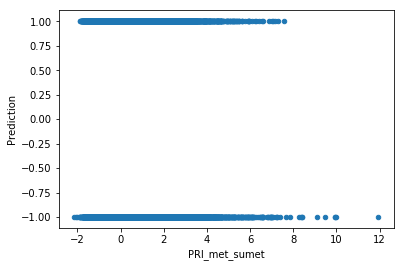

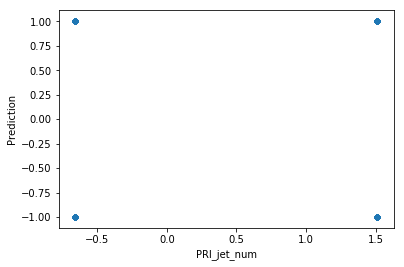

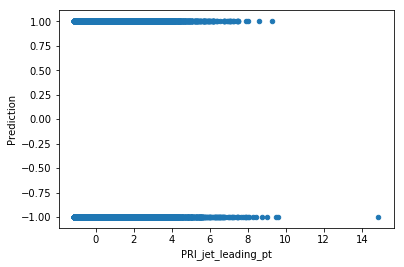

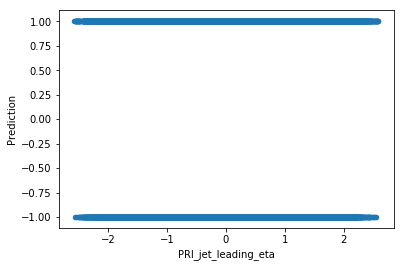

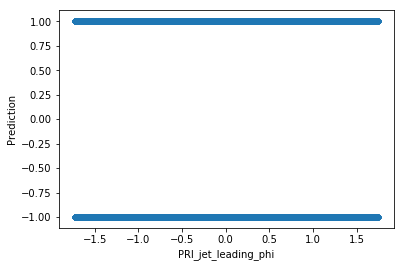

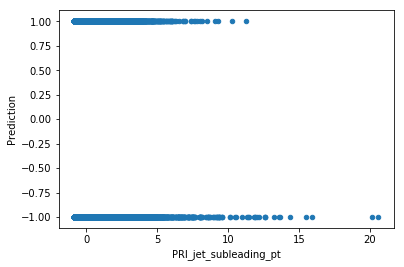

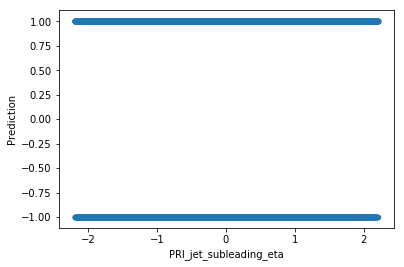

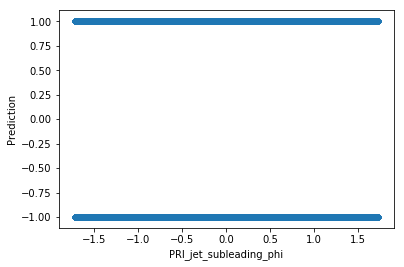

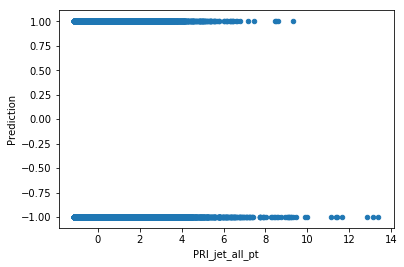

In [8]:
for i in df_tr.columns[2:]:
    df_tr.plot.scatter(x=i, y='Prediction')


In [48]:
import numpy as np 
libPath = 'project1/scripts'
import sys
if not libPath in sys.path: sys.path.append(libPath)
from proj1_helpers import *

yb, input_data, ids = load_csv_data("train.csv")

In [49]:
# print(yb)
print(input_data.shape)
# print(ids)

(250000, 30)


In [50]:
# Remove missing data
# Contain the indices of missing values 

missing_ind = (input_data[:,4]==-999)

for col in range(30): 
    input_data = input_data[~(input_data[:,col]==-999)]
    
# print(input_data[:,4])
# print(input_data)
# df_m = np.mean(df_tr,0)
# df_st = np.std(df_tr,0)


[False  True  True ...  True  True  True]


In [47]:
# print(input_data.shape)
input_m = np.mean(input_data,0)
input_std = np.std(input_data, 0)

input_data = (input_data - input_m)/input_std

# df_tr.iloc[:, 2:] = (df_tr.iloc[:, 2:] - df_m[2:])/df_st



[[ 0.25767126  0.53283515  0.47461094 -1.09345441 -0.87064819 -0.63242833
   0.98731346  1.37804494  0.51549536 -0.64313461  0.09205652  0.8203249
  -0.6621994  -0.44063129  0.86513362  0.20892619 -0.02803712  1.90142579
  -1.352776   -0.89329993 -0.15656359 -0.54298155 -0.6604439  -0.57866597
   1.23439906  0.25179525 -0.36784371  0.61296467 -1.35932881 -0.64515168]
 [-0.54438812 -0.70635039 -0.47504382  0.06438322  0.11525063 -0.233525
   0.09492308 -0.81913195  1.21210996 -0.02033658 -0.81324448 -0.17116673
   1.28298905  0.26731433  0.31741279  0.73028451 -0.72463203 -0.73523156
   0.99980927 -0.33319688  1.22941639 -0.3705594   1.51413316 -0.23960808
  -1.37778781 -0.35452909 -0.05432042  0.11591226  1.71182322  0.09496062]
 [ 0.4269521  -0.20839975  0.71903446 -0.0694513  -0.97175138 -0.54847232
   0.27668569  1.21925954 -0.87776921  0.18766458  1.72141616  0.8170812
   0.82116366 -0.56825219  0.94652866  1.32423702  1.55585601  0.56681114
  -0.55517744 -0.38740116 -0.79938485 -0